# Plot PCA plots for solvers

In [3]:
import torch
import torch.nn as nn

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

import os
from tqdm import tqdm 

## Hyper-Parameters

In [18]:
EPS=1 # 0.1, 1, 10

## 1. Load Input and Target samples

In [19]:
input_samples = torch.load(f"./data_for_plots/eps_{EPS}/PCA/input_{EPS}.pth")
target_samples = torch.load(f"./data_for_plots/eps_{EPS}/PCA/target_{EPS}.pth")

## 2. Methods

In [20]:
if EPS == 1:
    methods = ['alter','joint','lsot','scones','gt','bortoli','egeot','enot','flow','vargas']
    indices = [271,185,292,532,1]
    xlims =  [-6,6]
    ylims =  [-4,6.2]
elif EPS == 0.1:
    methods = ['alter','joint','gt','bortoli','flow','enot','egeot','vargas']
    indices = [206,22,798,993,835]
    xlims = [-5,5]
    ylims = [-3,3.5]
else:
    methods = ['lsot','scones','flow','gt','enot','egeot','vargas']
    indices = [776,911,546,468,384]
    xlims = [-4,6]
    ylims = [-3,6]

## 3. Plot Images

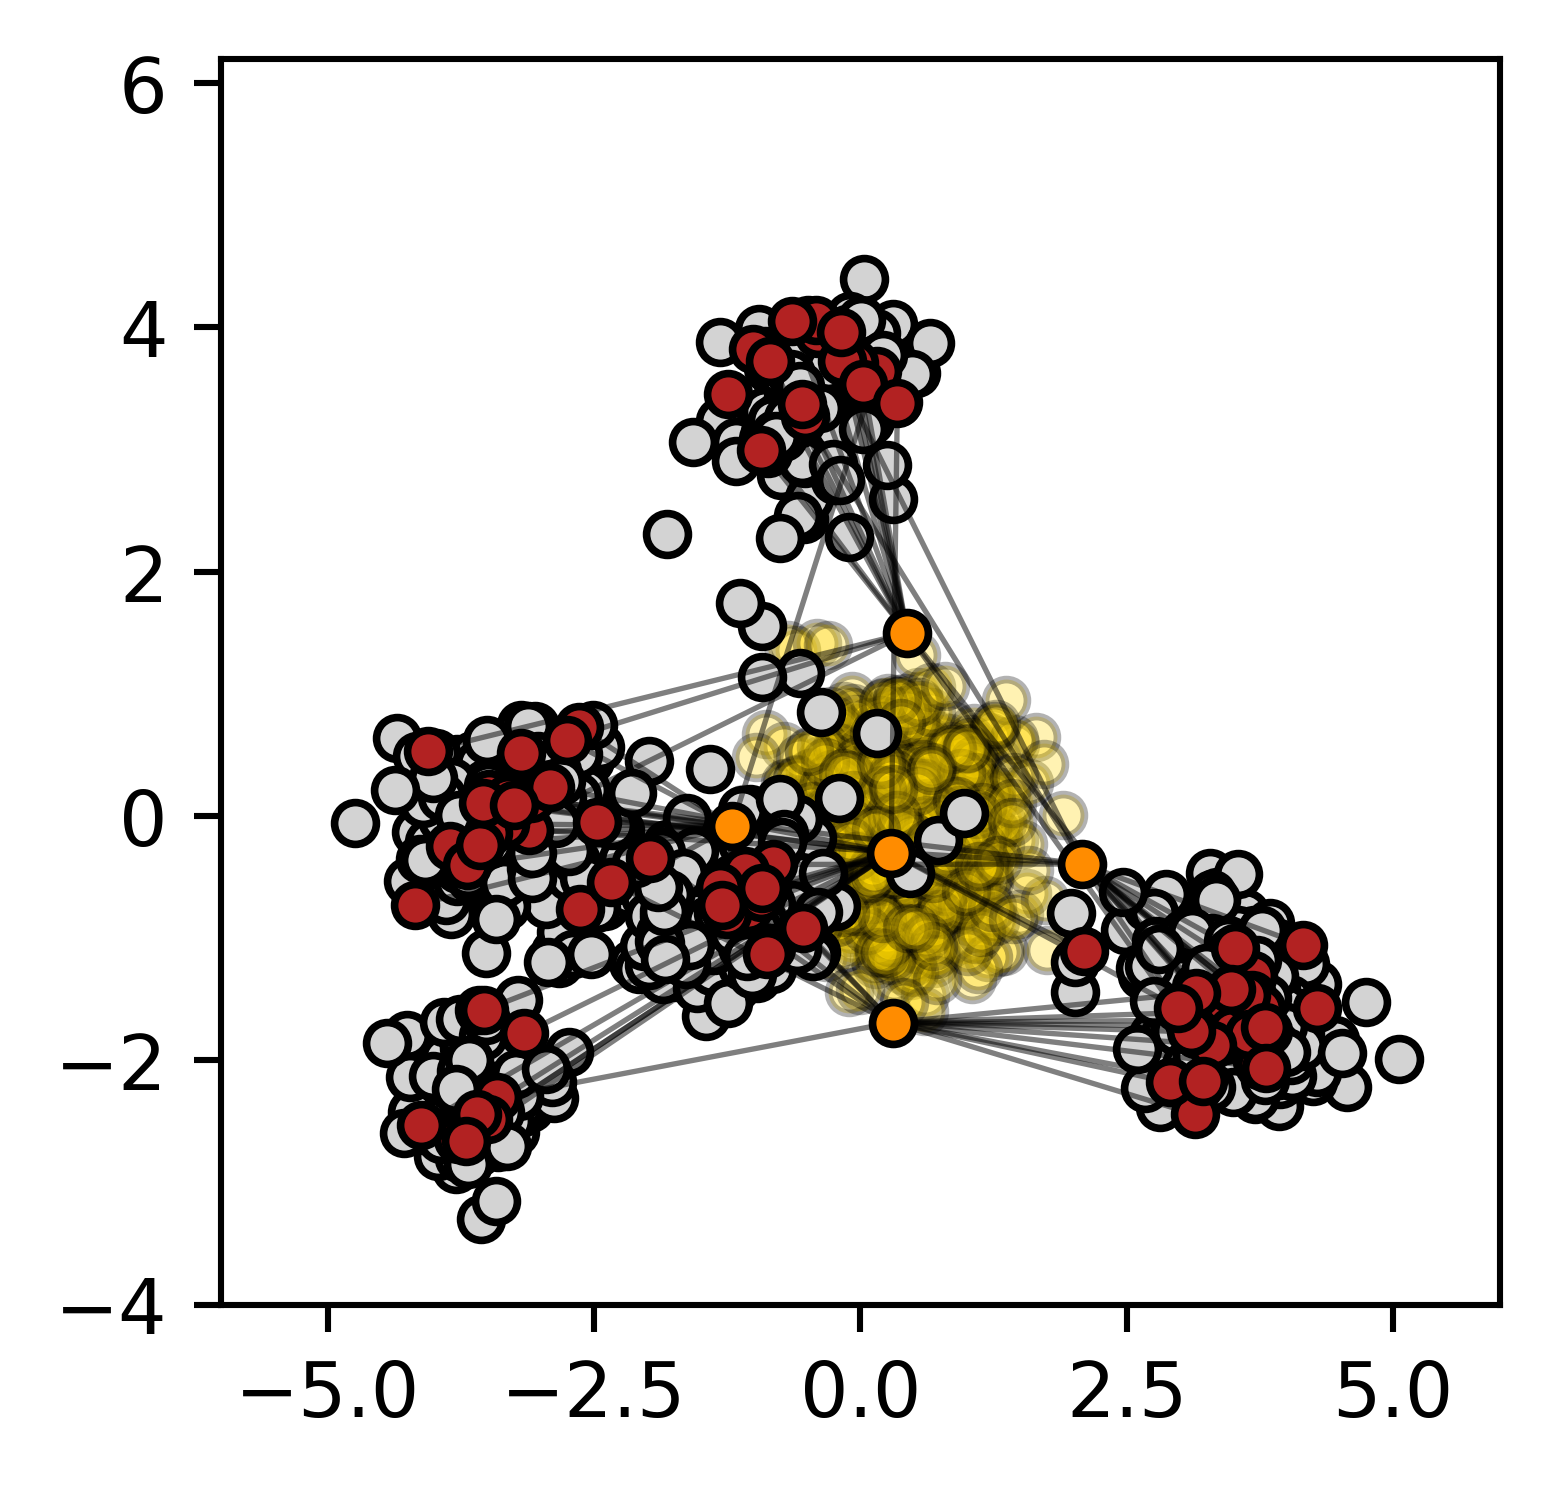

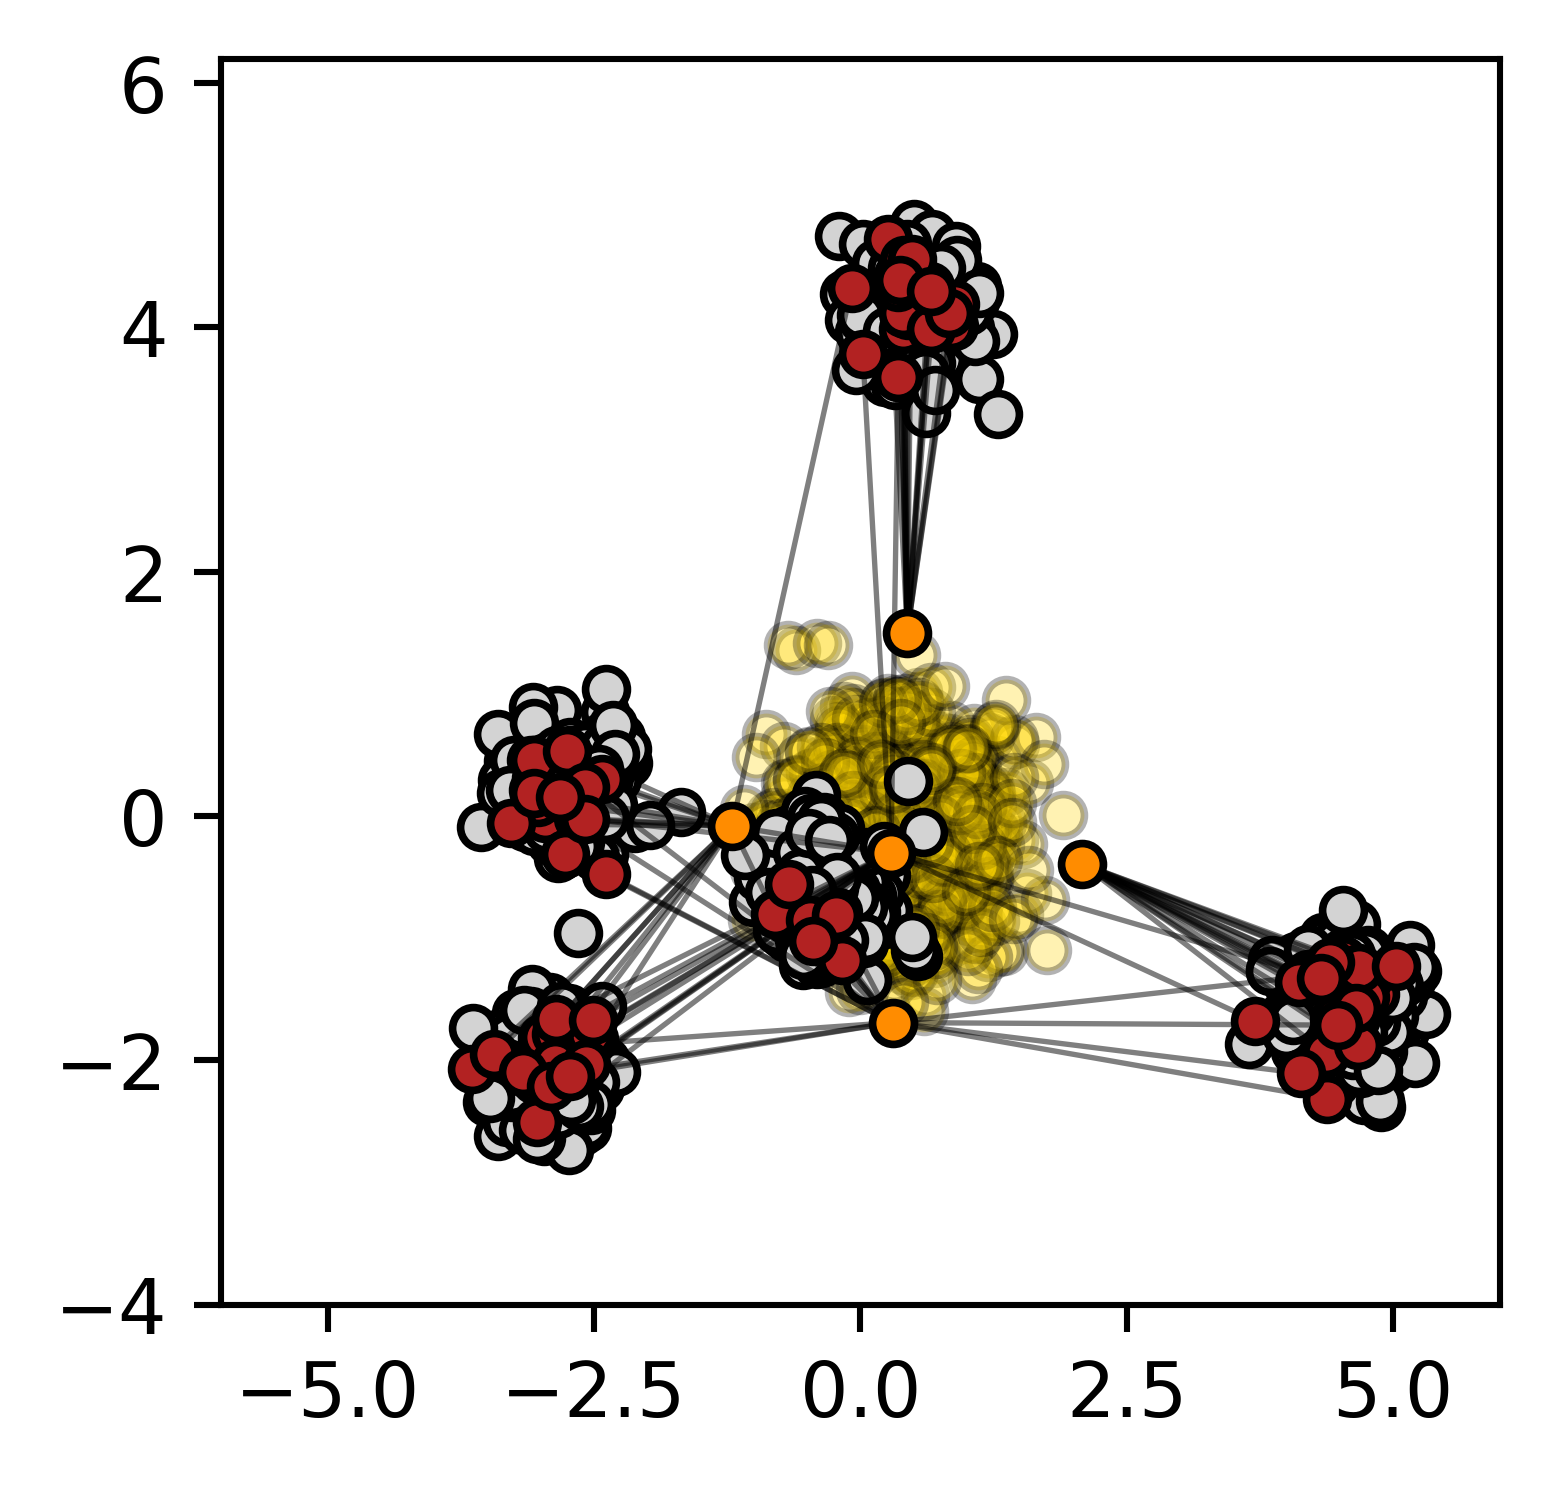

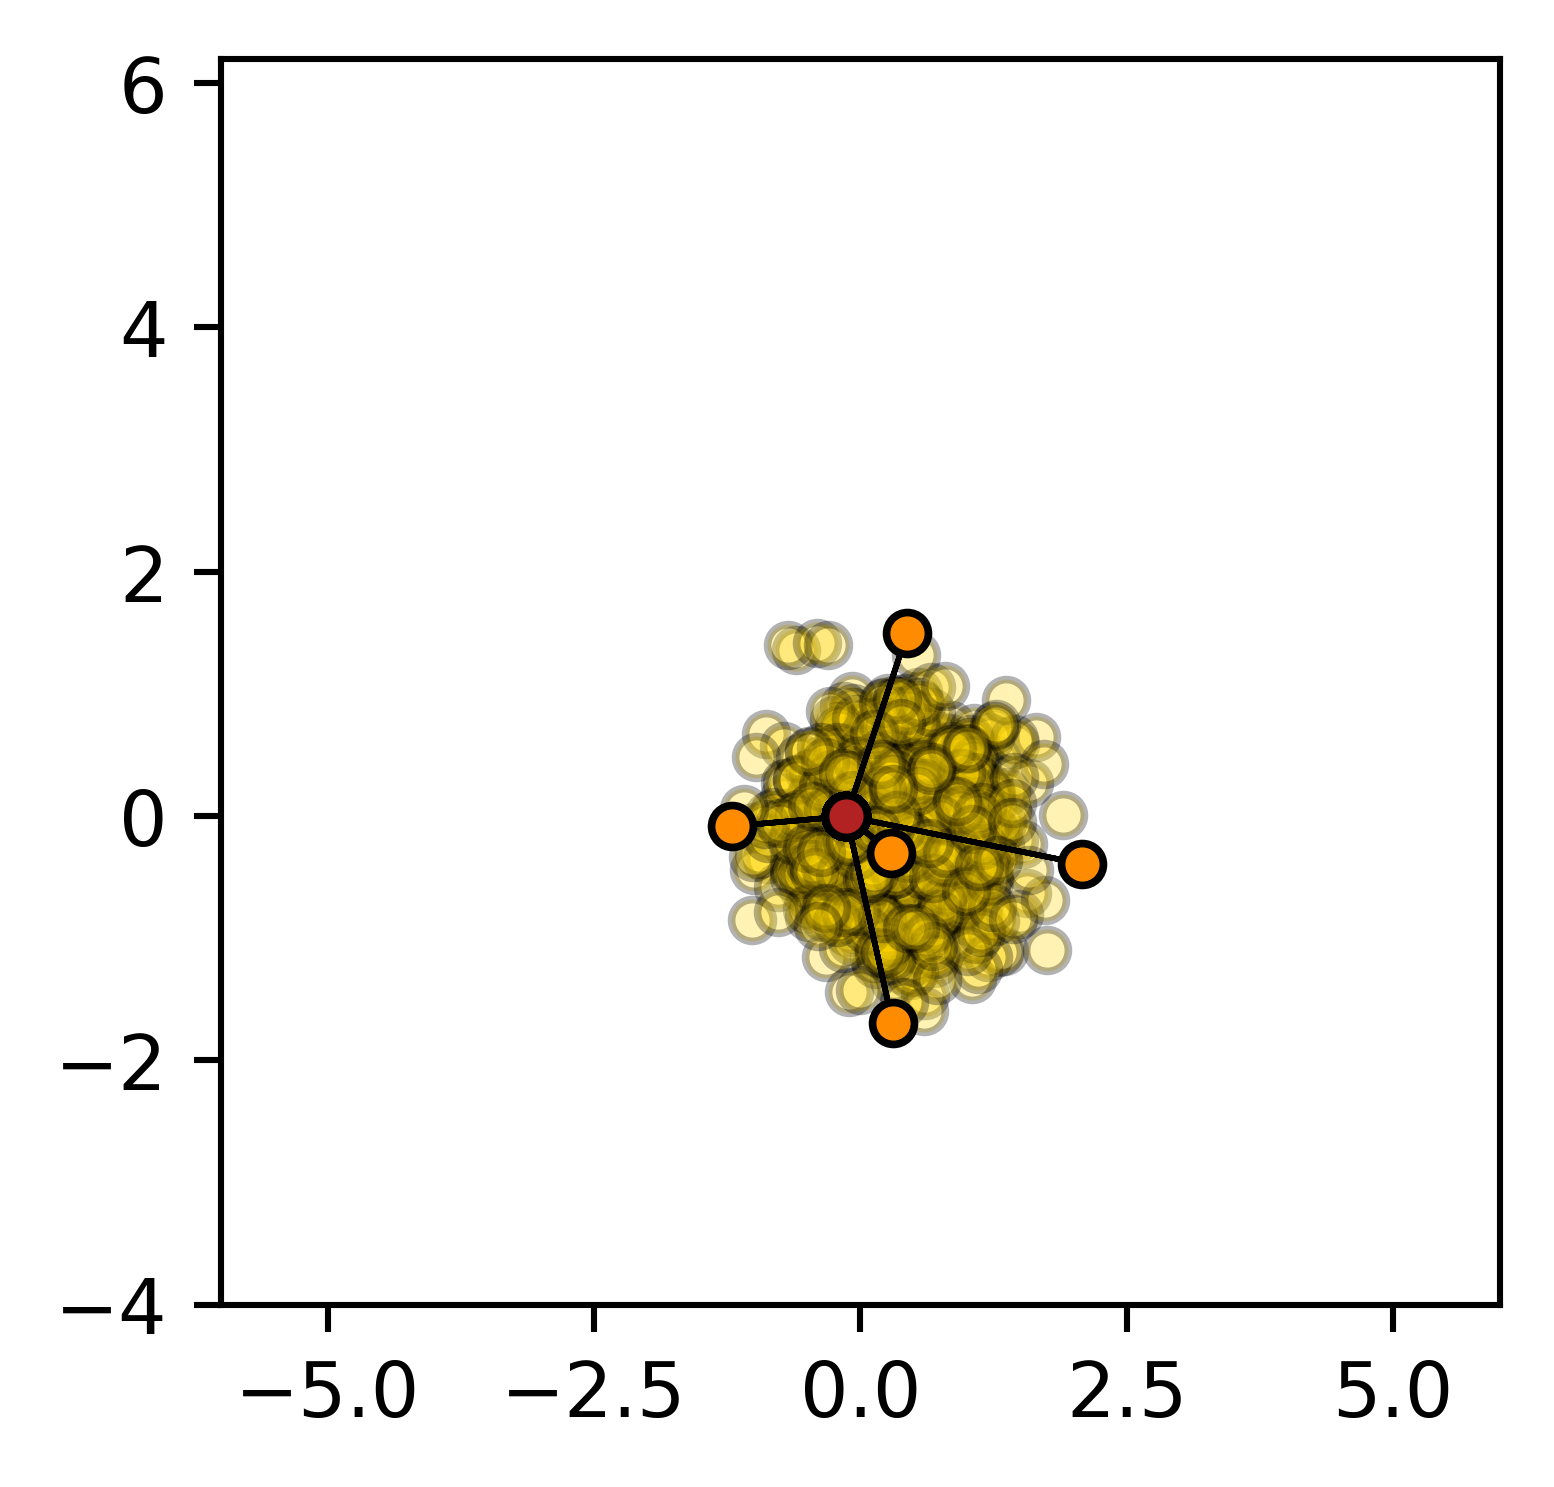

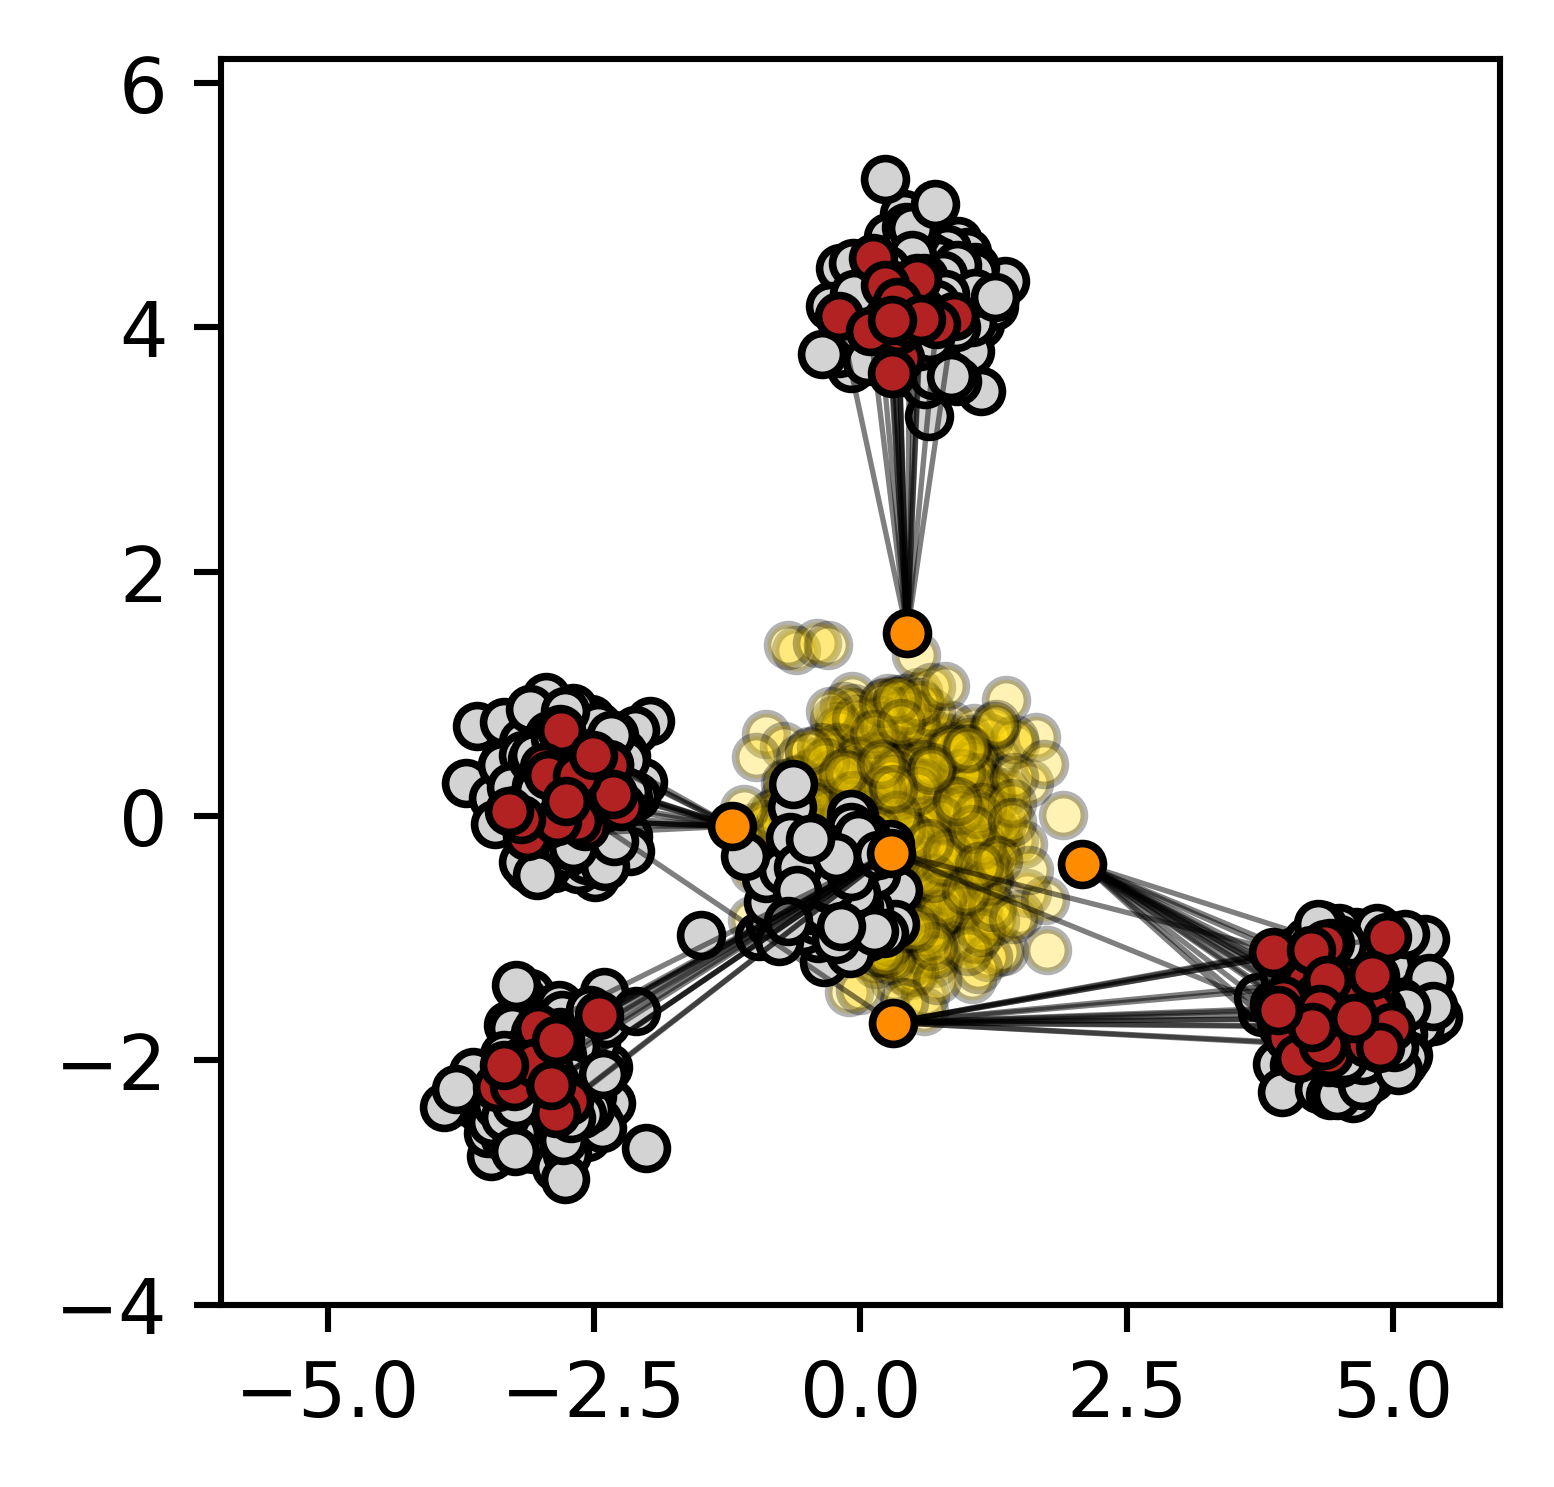

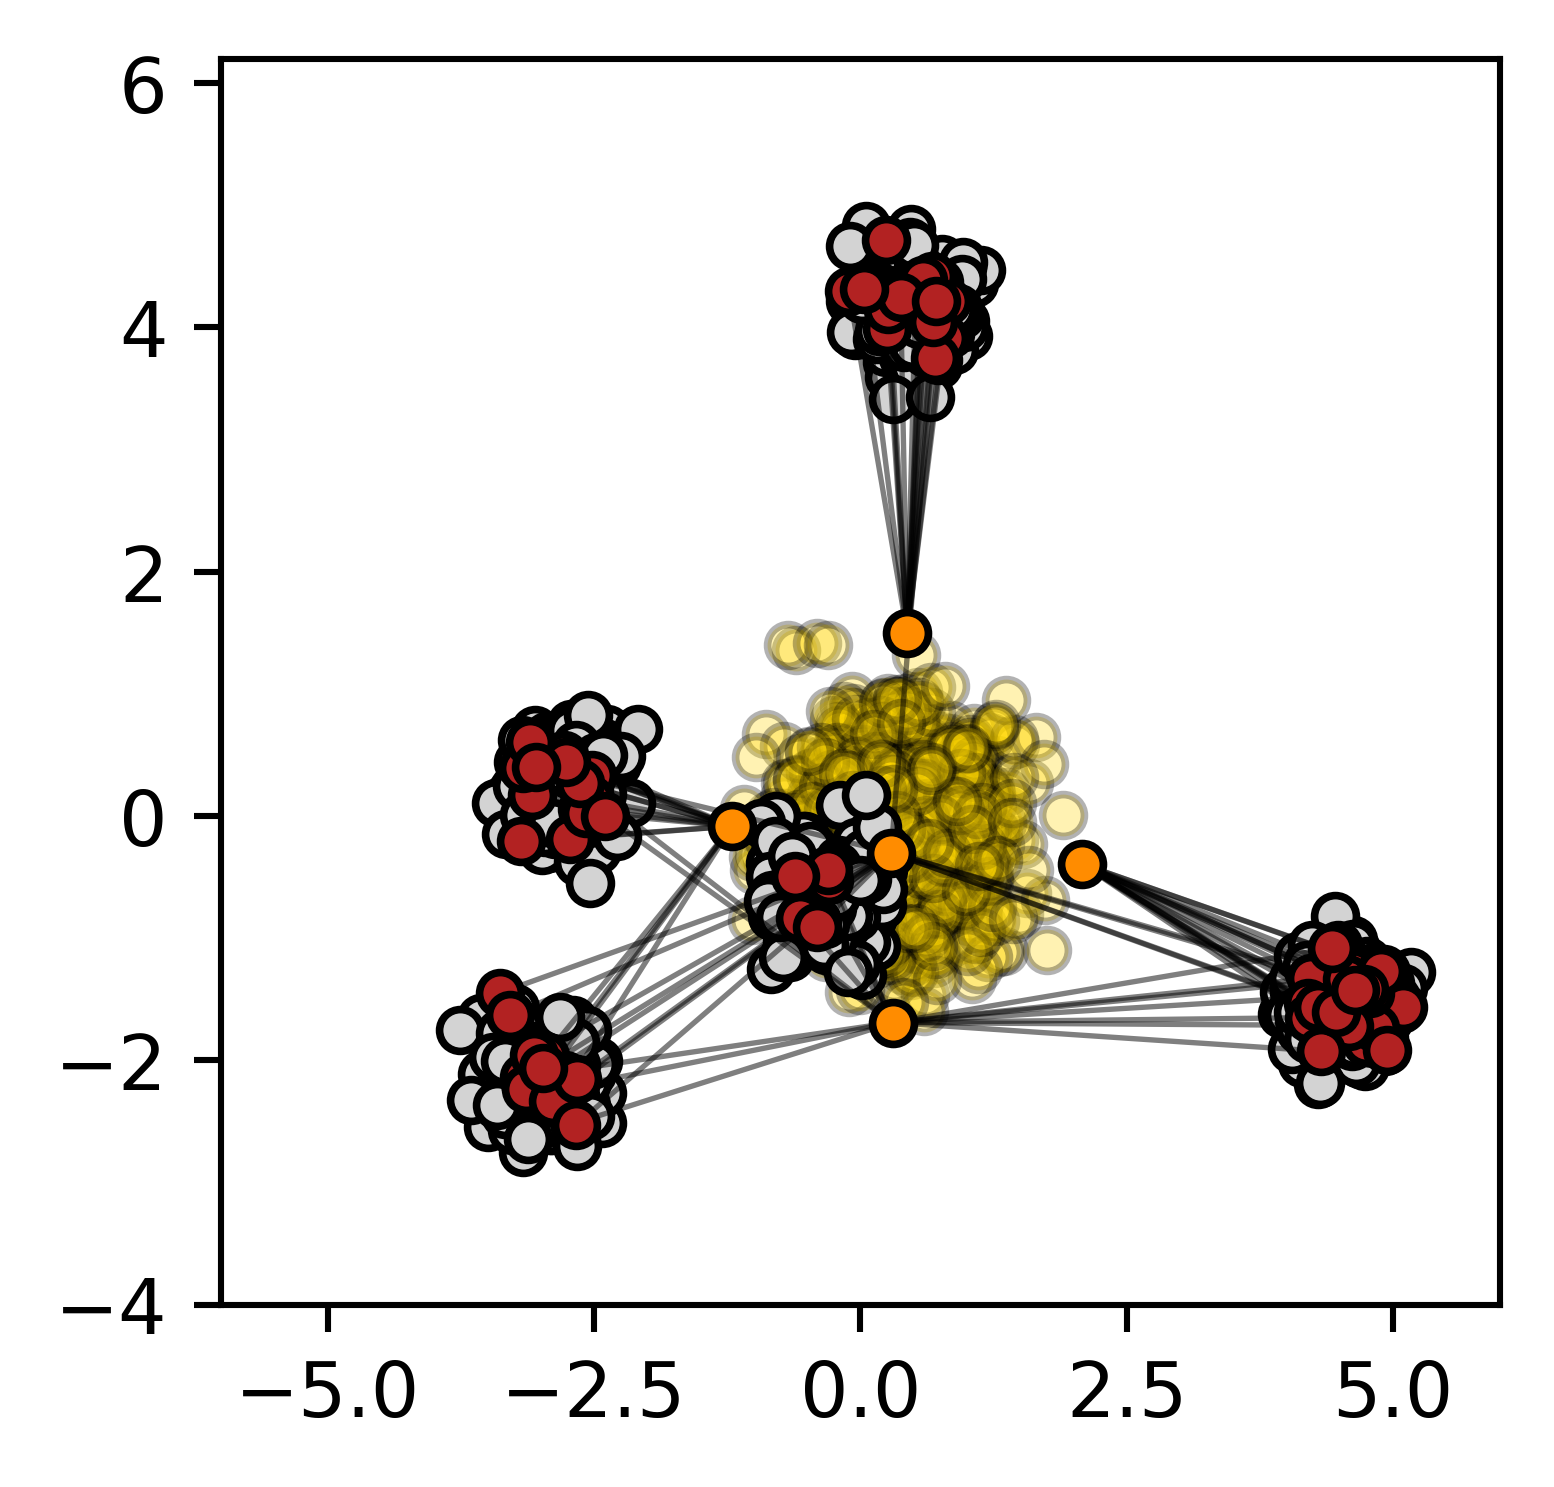

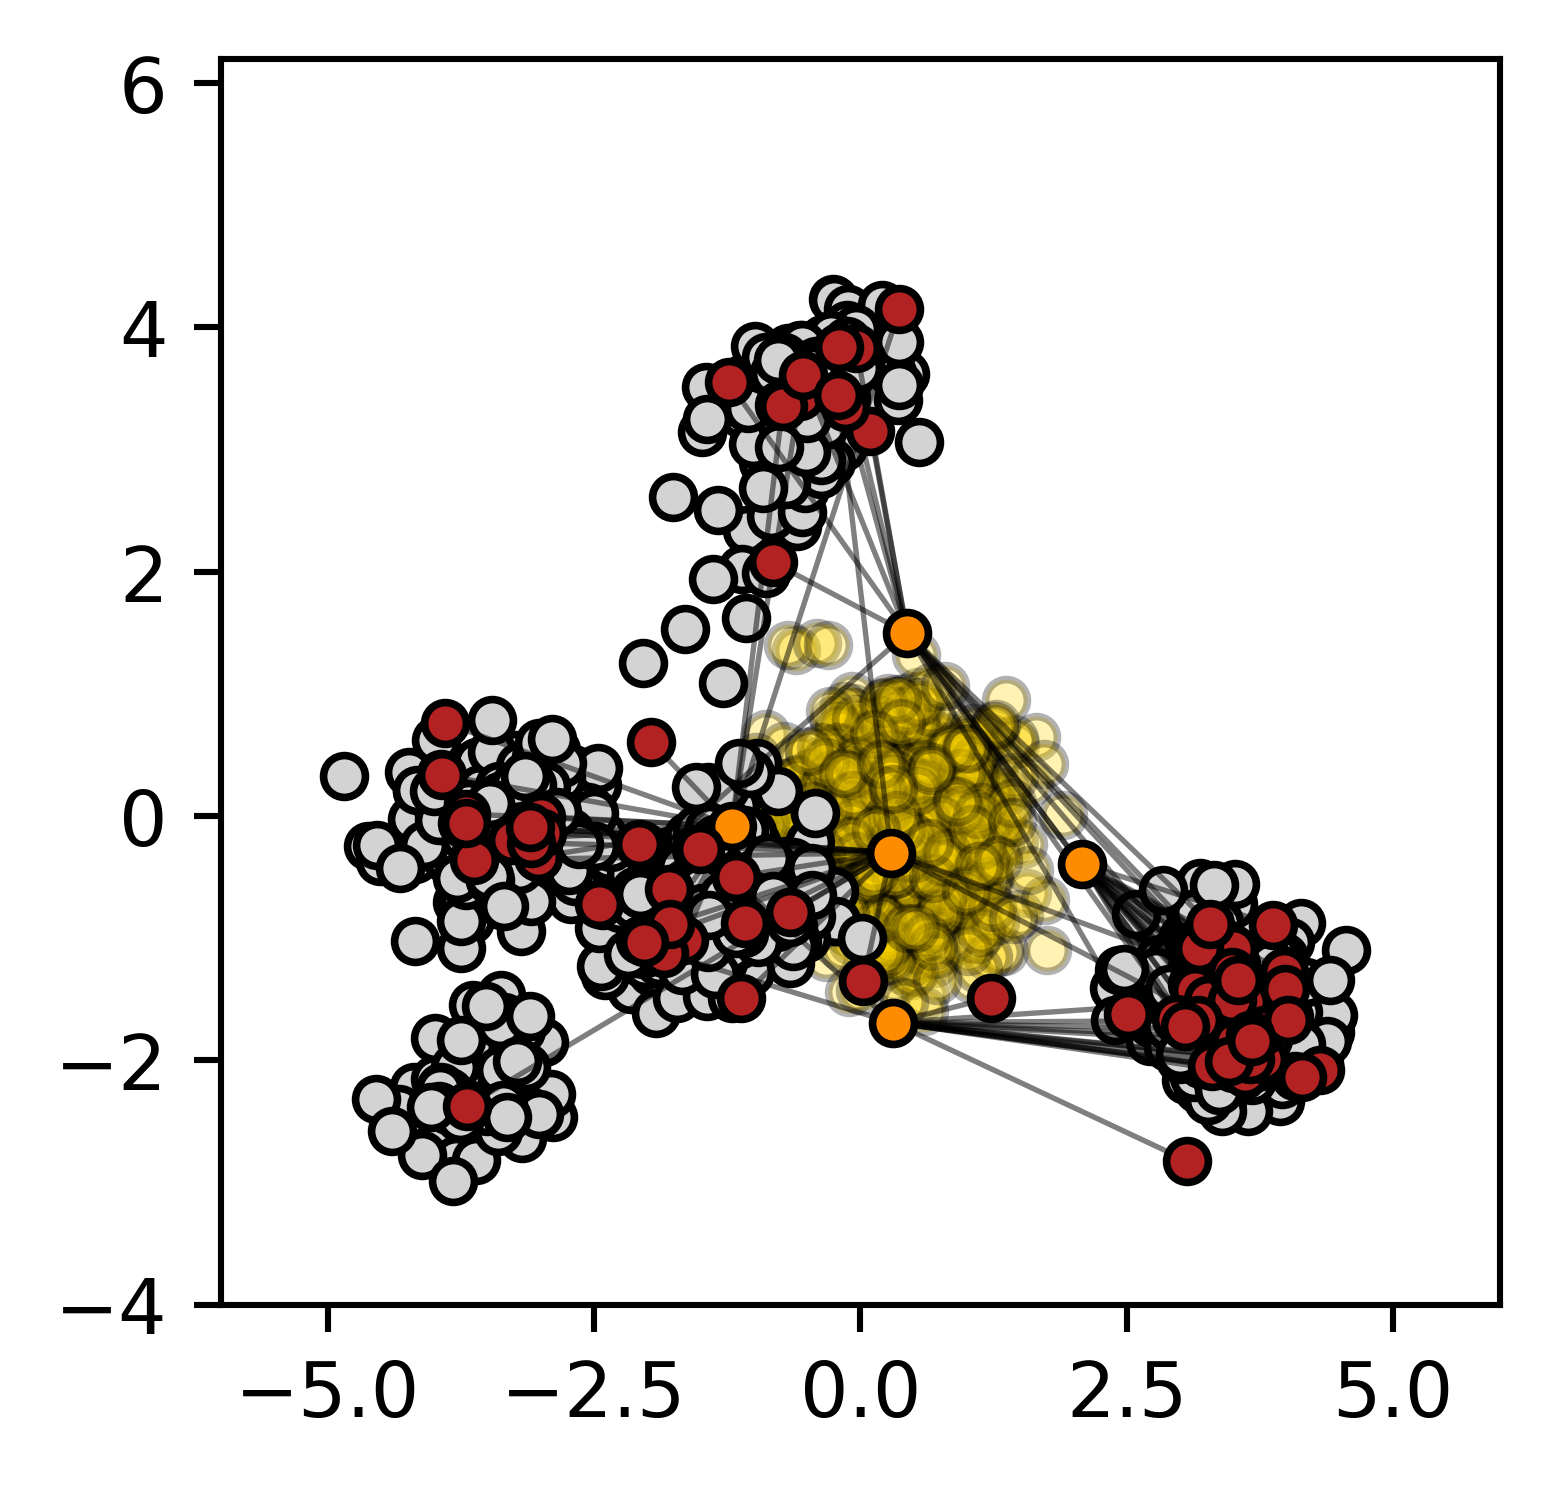

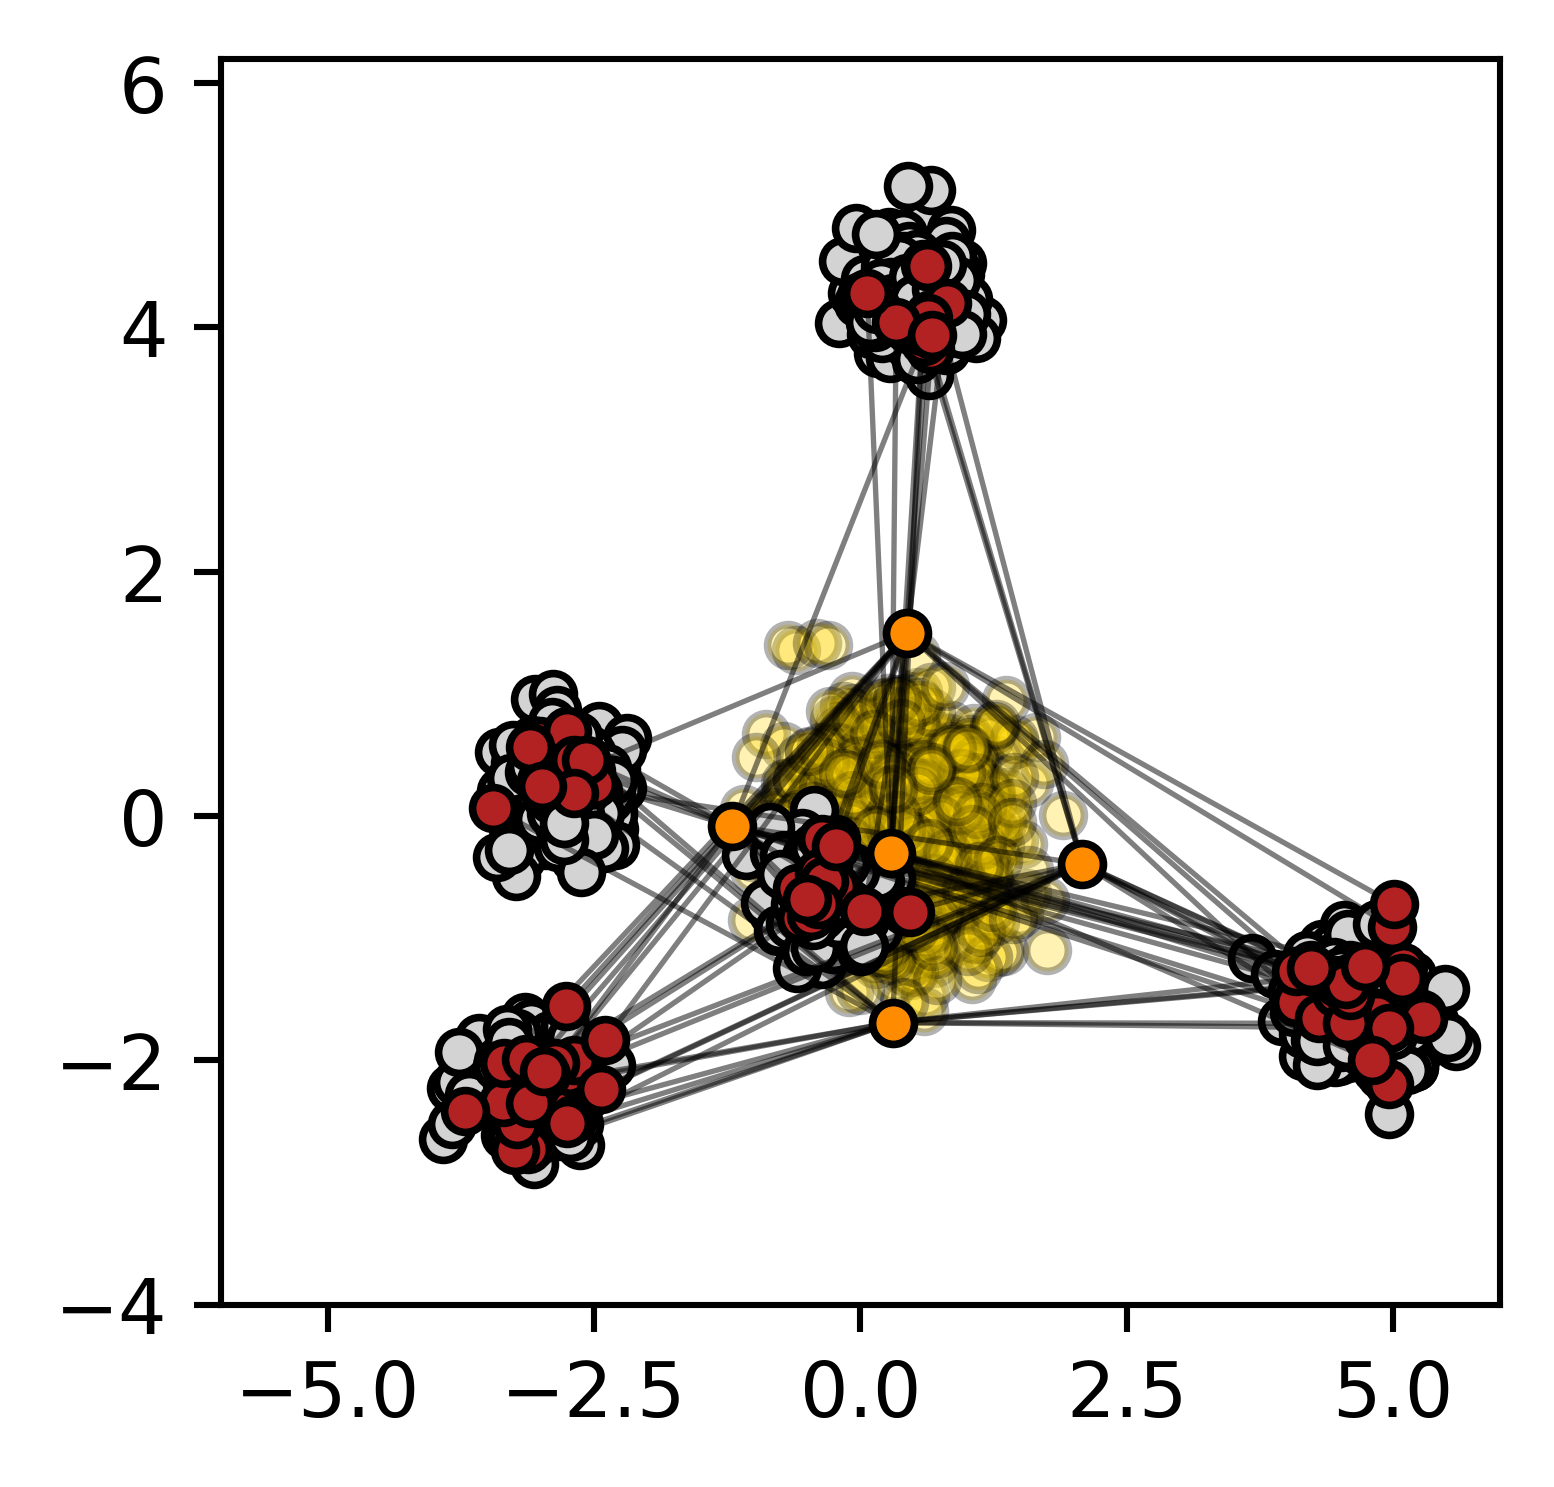

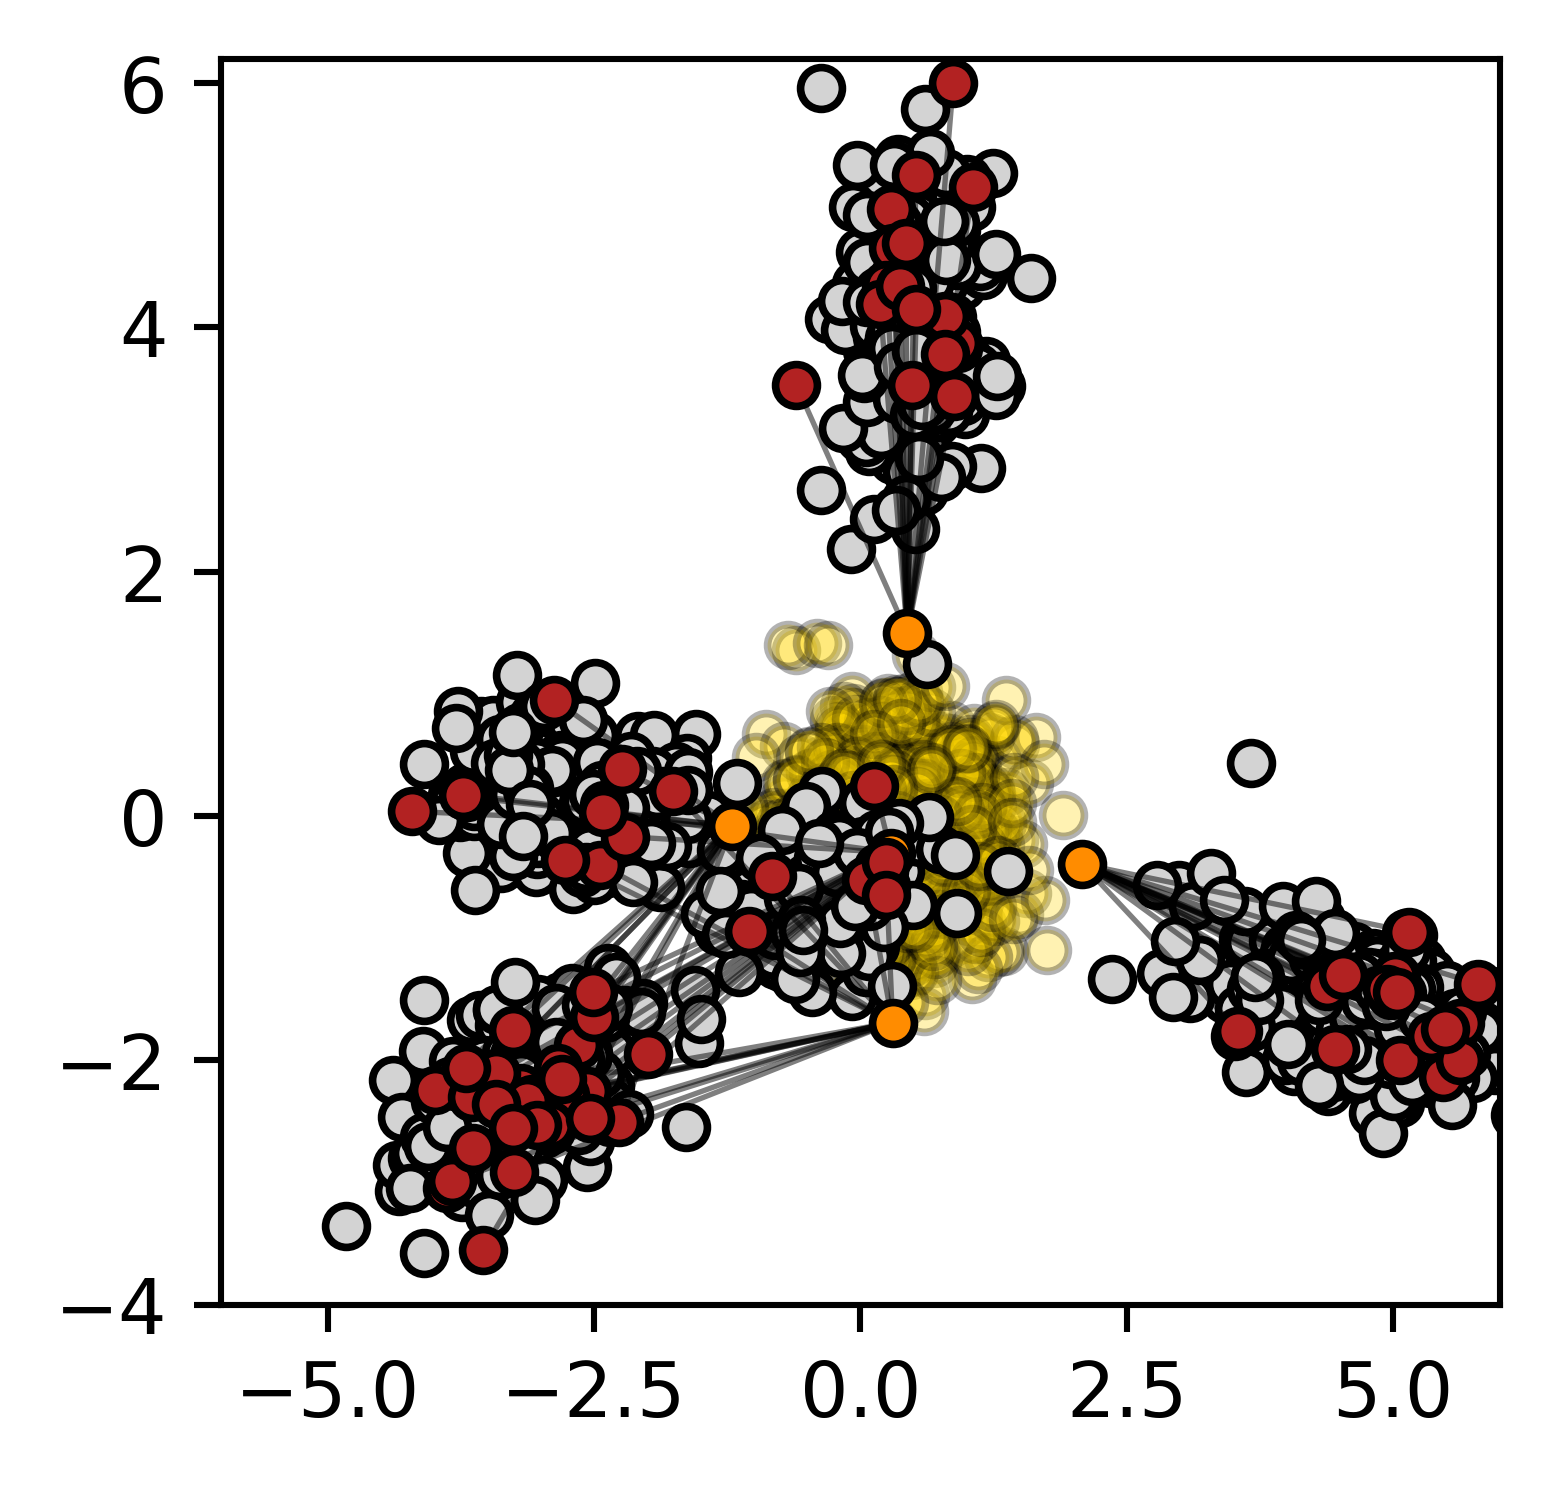

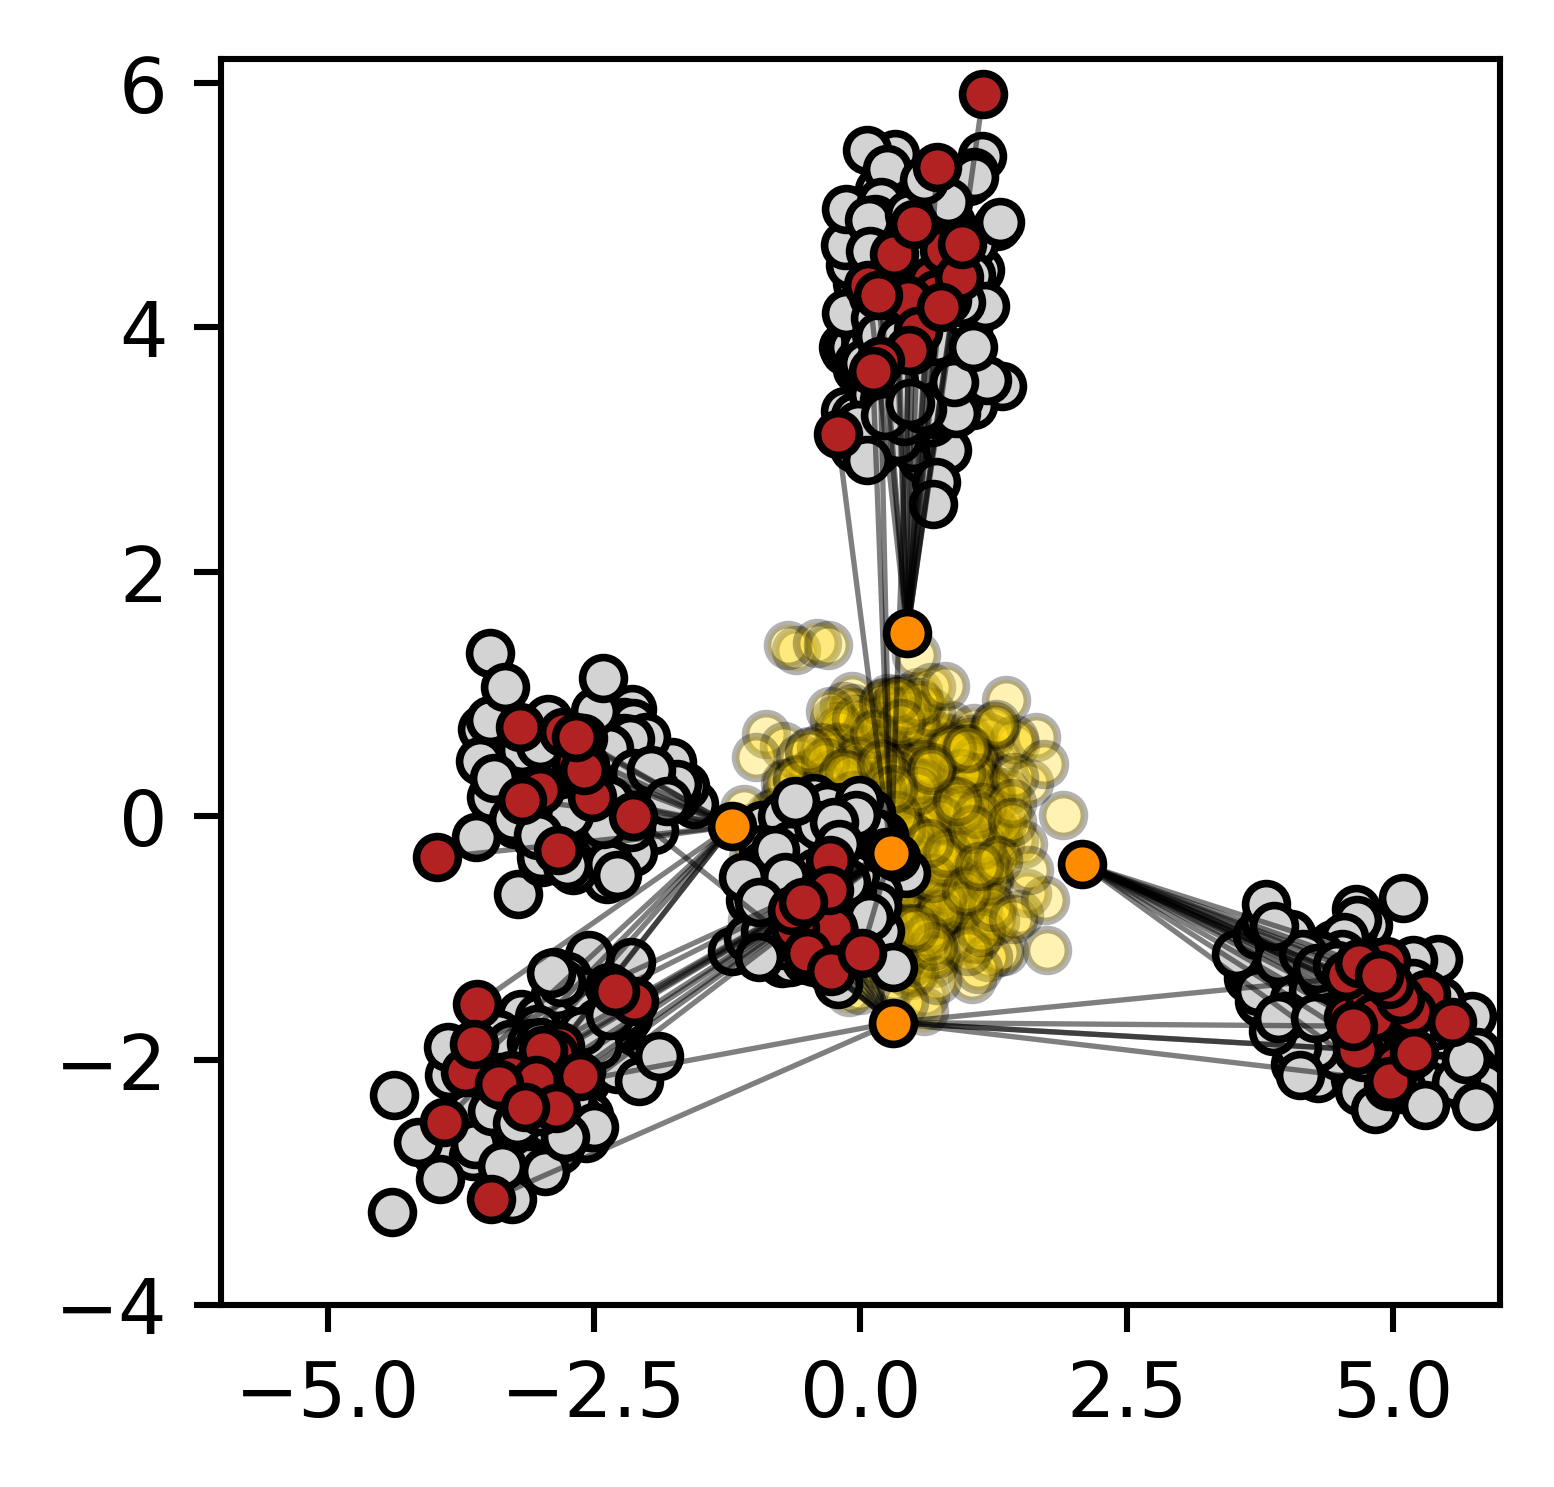

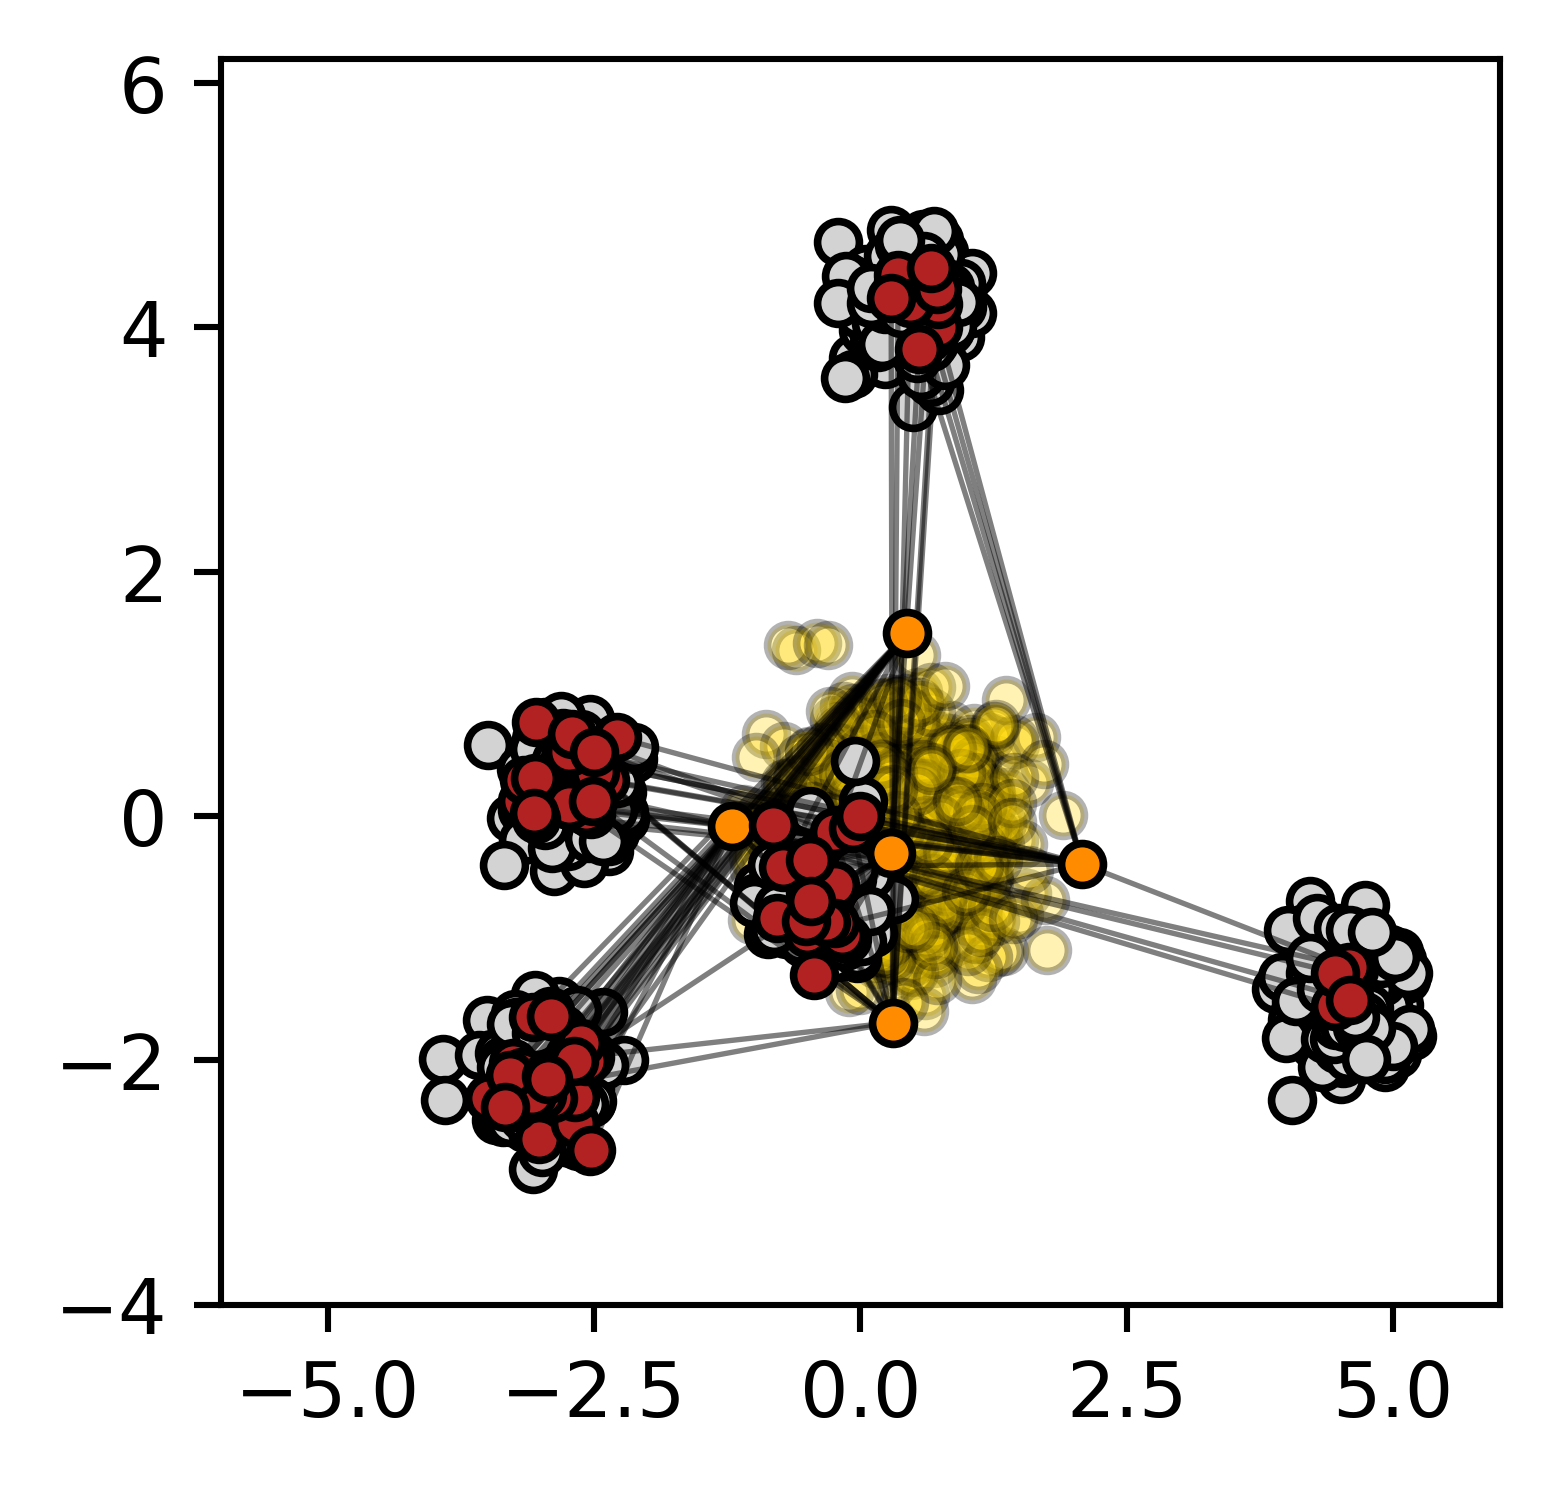

In [21]:
for i, method in enumerate(methods):
    
    
    mapped_points = torch.load(f"./data_for_plots/eps_{EPS}/PCA/mapped_{method}")
    re_points = torch.load(f"./data_for_plots/eps_{EPS}/PCA/re_{method}")
    
    pca = PCA(n_components=2).fit(target_samples.cpu().numpy())
    map_data_emb = pca.transform(mapped_points.detach().cpu().numpy())[:1000]
    input_data_emb = pca.transform(input_samples.cpu().numpy())[:1000]
    start_points_emb = pca.transform(input_samples[indices].cpu().numpy())
    target_points_emb = pca.transform(target_samples.detach().cpu().numpy())[:1000]
    
    re_points_emb = [ pca.transform(re_points[:,j,:].detach().cpu().numpy()) for j in range(5)]
    fig,ax = plt.subplots(1,1,figsize=(3,3),dpi=550)
    ax.scatter(input_data_emb[:,0],input_data_emb[:,1],edgecolor='black',color='gold',s=30,alpha=0.3 )
    ax.scatter(map_data_emb[:,0],map_data_emb[:,1],edgecolor='black',color='lightgray',s=30,alpha=1)
    ax.scatter(start_points_emb[:,0],start_points_emb[:,1],c='darkorange',edgecolor='black',
               s=30,zorder=2)
    
    for j in range(5):
        ax.scatter(re_points_emb[j][:16,0], re_points_emb[j][:16,1],c='firebrick',edgecolor='black',
               s=30,label =r"$y'  \sim  \pi^{*}(\cdot|x')$" if j ==4 else None, zorder=2)
    
    for i in range(16):
        for j in range(5):
            x_values = [start_points_emb[j,0],re_points_emb[j][i,0]]
            y_values = [start_points_emb[j,1],re_points_emb[j][i,1]]
            ax.plot(x_values,y_values,color='black',alpha=0.5,linewidth=0.7,zorder=1)
        
    
    ax.set_ylim(ylims)
    ax.set_xlim(xlims)
    
    ax.legend(loc='upper left', ncol=1,  fontsize="large",handletextpad=0.05,handlelength=1.3,
         #markerscale=1,handleheight=0.01,edgecolor='black',framealpha=1);
    fig.savefig(f"{method}_eps_{EPS}.png",transparent=True)
 

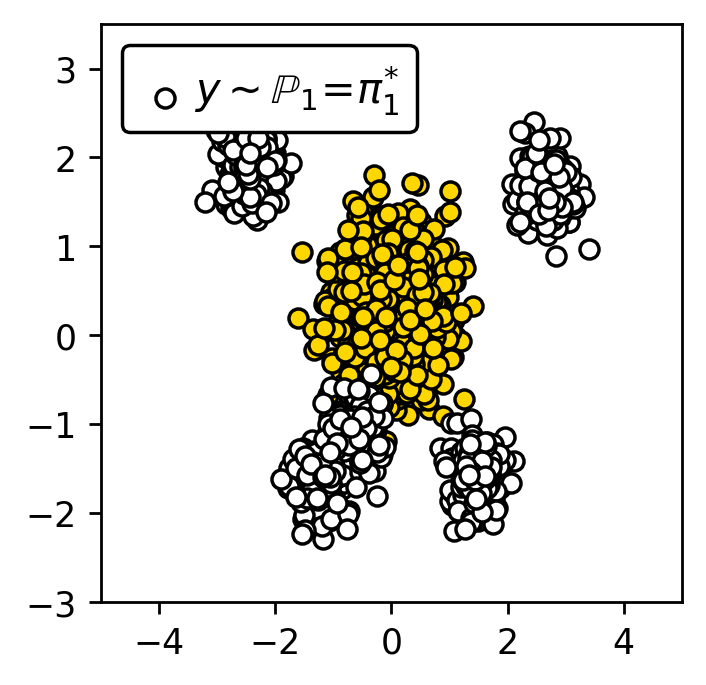

In [11]:
fig,ax = plt.subplots(1,1,figsize=(3,3),dpi=250)
 
ax.scatter(input_data_emb[:,0],input_data_emb[:,1],edgecolor='black',color='gold',s=30,
           alpha=1)
ax.scatter(target_points_emb[:,0],target_points_emb[:,1],edgecolor='black',color='white',s=30,
           alpha=1,label=r'$y \sim \mathbb{P}_{1}\!=\!\pi^{*}_{1}$',zorder=2)
ax.legend(loc='upper left', framealpha=1,edgecolor='black',fontsize="large",handletextpad=0.05,handlelength=1.3,
         markerscale=1,handleheight=0.01)
ax.set_xlim(xlims)
ax.set_ylim(ylims);
#fig.savefig("Input_eps_{EPS}.png",transparent=True)